In [9]:
import torch
import torchvision

import matplotlib.pyplot as plt

import numpy as np


from utils.transforms import *

In [10]:
cifar10_dataset = torchvision.datasets.CIFAR10('dataset', download=True)
img = cifar10_dataset[0][0]

Files already downloaded and verified


In [11]:
names = list(transformations_dict.keys())

In [18]:
seq = """
2024/03/15 03:33:07	0) Cuto_0.8_0.2 Post_0.8_0.1 || Cuto_0.8_0.8 Sola_0.8_0.3: 1
2024/03/15 03:33:07	
2024/03/15 03:33:07	1) Equa_0.8_0.2 Cont_0.8_0.6 || Inve_0.8_0.2 Iden_0.8_0.2: 1
2024/03/15 03:33:07	
2024/03/15 03:33:07	2) Brig_0.8_0.0 Equa_0.8_0.1 || Cuto_0.8_0.9 Inve_0.8_1.0: 1
2024/03/15 03:33:07	
2024/03/15 03:33:07	3) Sola_0.8_0.1 Sola_0.8_1.0 || Inve_0.8_0.7 Auto_0.8_0.3: 1
2024/03/15 03:33:07	
2024/03/15 03:33:07	4) Colo_0.8_0.0 Brig_0.8_0.1 || Brig_0.8_0.3 Auto_0.8_0.7: 1
"""

seq = seq.split('\n')

seq = [' '.join(line.split(' ')[2:-1])[:-1] for line in seq if '||' in line]
seq = [line.split(' || ') for line in seq]
seq = [ [branch.split(' ') for branch in line] for line in seq ]
seq = [ [ [ branch[0].split('_'), branch[1].split('_') ] for branch in line] for line in seq ]

ret = []
for line in seq:
    ret.append([])
    for branch in line:
        ret[-1].append([])
        for sub_name, pr, val in branch:
            name = [ name for name in names if name.startswith(sub_name)][0]
            ret[-1][-1].append((name, float(val)))

ret

[[[('Cutout', 0.2), ('Posterize', 0.1)], [('Cutout', 0.8), ('Solarize', 0.3)]],
 [[('Equalize', 0.2), ('Contrast', 0.6)],
  [('Invert', 0.2), ('Identity', 0.2)]],
 [[('Brightness', 0.0), ('Equalize', 0.1)],
  [('Cutout', 0.9), ('Invert', 1.0)]],
 [[('Solarize', 0.1), ('Solarize', 1.0)],
  [('Invert', 0.7), ('AutoContrast', 0.3)]],
 [[('Color', 0.0), ('Brightness', 0.1)],
  [('Brightness', 0.3), ('AutoContrast', 0.7)]]]

[[('Cutout', 0.2), ('Posterize', 0.1)], [('Cutout', 0.8), ('Solarize', 0.3)]]


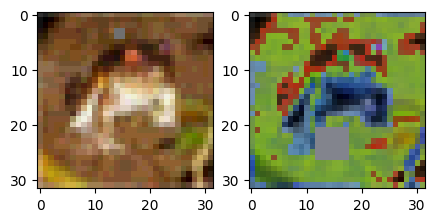

[[('Equalize', 0.2), ('Contrast', 0.6)], [('Invert', 0.2), ('Identity', 0.2)]]


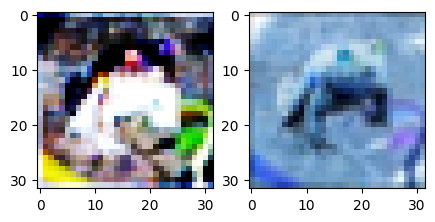

[[('Brightness', 0.0), ('Equalize', 0.1)], [('Cutout', 0.9), ('Invert', 1.0)]]


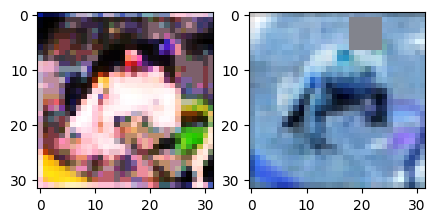

[[('Solarize', 0.1), ('Solarize', 1.0)], [('Invert', 0.7), ('AutoContrast', 0.3)]]


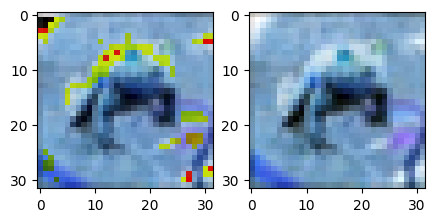

[[('Color', 0.0), ('Brightness', 0.1)], [('Brightness', 0.3), ('AutoContrast', 0.7)]]


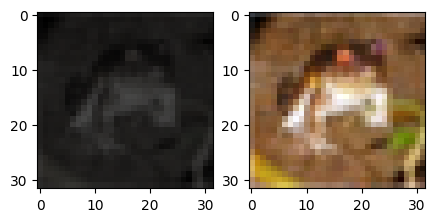

In [19]:
for line in ret:
    branch1, branch2 = line
    img1 = img.copy()
    img2 = img.copy()
    print(line)
    
    for name, val in branch1:
        img1 = apply_augment(img1, name, val)
    for name, val in branch2:
        img2 = apply_augment(img2, name, val)

    fig, axes = plt.subplots(1, 2, figsize=(5, 5))
    axes[0].imshow(img1)
    axes[1].imshow(img2)
    plt.show()